# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading compressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

### Idea of Task 1

1. For articles data, the file is in tsv format. We can use pandas **read_csv** function to read the data, and set the seperator as '\t'.

2. For topics data, the file is in json format. We can use pandas **read_json** function to read the data. 

3. Mapping data is stored in pickle file, it's easy to read it by using **pickle.load** function.


In [1]:
import pandas as pd
import pickle

### ~ 1.1

#Read articles.tsv.gz
#Since it's a tsv file, the seperator is '\t'. We aslo ignore weird lines
articles = pd.read_csv('data/articles.tsv.gz',sep="\t",compression='gzip',error_bad_lines=False)

#Read topics.jsonl.gz
topics = pd.read_json('data/topics.jsonl.gz',compression='gzip',lines=True)

#Read mapping.pickle
mapping = pickle.load(open("data/mapping.pickle","rb"))

b'Skipping line 7: expected 944 fields, saw 945\n'


We can set the name of articles and topics as the index of dataframes and check if the index is unique.

This step is necessary for futher data processing.

In [2]:
#Check whether the index column of articles and topics are unique
print(articles['index'].is_unique)
print(topics['index'].is_unique)

True
True


Based on previous results, the index column of articles and topics is uniuqe. We set this column as the index of dataframe.

In [3]:
#We set the index column of articles and topics as their index
articles = articles.set_index('index')
topics = topics.set_index('index')

Let's get a glimpse of data

In [4]:
articles.head()

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
index,,,,,,,,,,,,,,,,,,,,,
Khulna,0,2,1,0,0,2,0,2,0,1,...,0,1,1,0,1,1,0,2,1,2
Karim_Ansarifard,1,5,1,1,1,3,6,4,5,6,...,2,2,0,1,2,0,1,0,0,0
Poldhu,0,0,1,1,0,1,0,2,2,3,...,0,2,2,0,0,0,2,1,2,1
Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Palmyra,1,4,0,0,0,2,11,2,0,0,...,0,0,1,0,0,0,1,0,0,0


In [5]:
topics.head()

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
index,,,,,,,,,,,,,,,,,,,,,
Chinese_food_therapy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Battle_of_Naissus,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Smooth_newt,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

### Idea of Task 2

1. To locate discussion pages, we can find those names starting with "Discussione".

2. These discussion pages are not important, so we shall drop these pages.

In [6]:
### ~ 2.1

#Find discussion pages starting with 'Discussione' and drop them
articles=articles[~articles.index.str.startswith('Discussione')]

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

### Idea of Task 3.1

1. The number of topics and articles is easy to calculate by getting the length of dataframes. By printing the columns of topics dataframe, we will get a grasp of them.

2. To get average daily number of pageveiws in the dataset. We first sum up pageviews each day and compute the average.

3. We first search the daily average pageviews from 2018-01-01 to 2020-07-31. This number is the daily average pageviews for all italian Wikipedia articles. We divide this number by the daily average pageviews in the dataset, the we get the percentage. 

**Percentage** = (daily average pageviews in the dataset)/(daily average pageviews for all italian articles in this period)

In [7]:
### ~ 3.1.1

#Print the number of articles and topics
print("Number of articles: {}".format(len(articles)))
print("Number of topics: {}".format(len(topics)))

#Print the name of the topics
print(topics.columns)

Number of articles: 55791
Number of topics: 35611
Index(['Geography.Regions.Asia.Central Asia',
       'Geography.Regions.Europe.Eastern Europe',
       'History and Society.Military and warfare', 'Culture.Media.Television',
       'History and Society.Education', 'Culture.Media.Books',
       'Geography.Regions.Africa.Africa*', 'Culture.Visual arts.Architecture',
       'Culture.Biography.Women', 'Geography.Regions.Americas.North America',
       'STEM.STEM*', 'Culture.Performing arts', 'Culture.Literature',
       'History and Society.Politics and government',
       'Geography.Regions.Africa.Northern Africa',
       'STEM.Earth and environment', 'Geography.Regions.Africa.Central Africa',
       'STEM.Medicine & Health', 'STEM.Libraries & Information',
       'Geography.Regions.Europe.Europe*',
       'Geography.Regions.Europe.Western Europe', 'Culture.Media.Radio',
       'STEM.Space', 'Culture.Visual arts.Comics and Anime', 'STEM.Technology',
       'Culture.Internet culture', 'Cul

In [8]:
### ~ 3.1.2

#Compute average daily pageviews
#First compute the sum of pageviews for articles, then get the daily average pageview
print("Average daily pageviews of articles in the dataset: {:.6f}".format(articles.sum(axis=0).mean()))

Average daily pageviews of articles in the dataset: 324267.671262


In [9]:
### ~ 3.1.3

#According to the website, we search the daily average pageviews from 2018-01-01 to 2020-07-31.
#In this time period, the daily average pageview is 5,731,987
print("Percentage of samples:{:.4f}".format(articles.sum(axis=0).mean()/5731987))

Percentage of samples:0.0566



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



### Idea of Task 3.2

1. There are two conditions here. The first one is the find all articles whose name contain 'virus'. To do this, we use **str.contain('virus',case=False)** regardless of case. The second one is to locate articles that receive at least 7,000 pageviews. We can sum pageviews up across the whole period and select those we want.

2. We can create 8 subplots to plot each time-series. These subplots should use consistent y axes. Thus we can easily compare the number of pageviews.

In [10]:
### ~ 3.2.1

#Locate article's names who contain the sequence of required characters and received at least 7,000 pageviews.
#We set case parameter as false since it's case insensitive.
#To find articles received at least 7,000 pageviews, we sum pageviews up across time period
virus_articles = articles[articles.index.str.contains('virus',case=False)&(articles.sum(axis=1)>=7000)]
virus_articles

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
index,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,13,12,13,9,6,10,11,7,7,8
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,142,30,25,126,30,27,147,25,39,146
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,37,27,30,70,36,39,39,35,35,44
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,8,10,10,13,6,14,10,8,9,14
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,21,38,21,18,30,24,33,28,22,17
Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,5,...,10,9,10,5,7,8,13,5,9,8
Antivirus,19,31,26,27,42,30,24,54,45,80,...,16,33,25,14,14,19,23,23,22,12
Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,19,...,11,10,10,4,4,9,4,12,5,7


From above results, we have 8 articles who meet the requirements. These pages contain the sequence of 'virus' and received at least 7,000 pageviews.

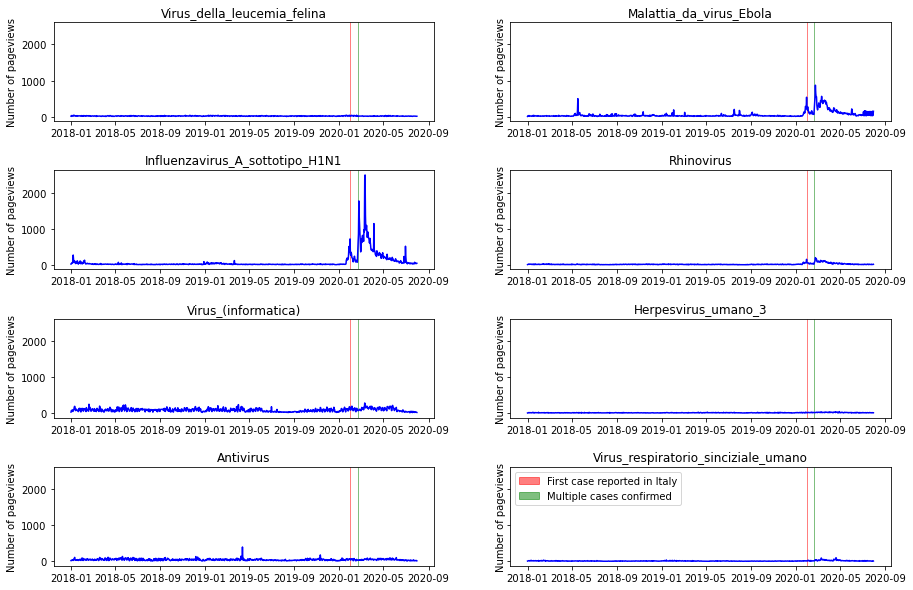

In [11]:
import matplotlib.pyplot as plt

### ~ 3.2.2

#Turn column dates into datetime objects
virus_articles.columns = pd.to_datetime(virus_articles.columns)

#Create subplots and plot each time-series
fig,axs = plt.subplots(4,2,sharey=True,figsize=(15,10)) 
plt.subplots_adjust(hspace=0.5) #Adjust the horizontal space between subplots
axs = axs.ravel() #axs array, each element represent one subplots

for i in range(8):
    
    axs[i].set_title(virus_articles.index[i]) #Set title for each subplots
    axs[i].set_ylabel('Number of pageviews') #Set y label
    axs[i].plot(virus_articles.columns,virus_articles.iloc[i],color='blue')
    axs[i].axvspan(pd.Timestamp('2020-01-31'),pd.Timestamp('2020-01-31'), label="First case reported in Italy",color="red", alpha=0.5)
    axs[i].axvspan(pd.Timestamp('2020-02-21'),pd.Timestamp('2020-02-21'), label="Multiple cases confirmed",color="green", alpha=0.5)
    
plt.legend()

We then set the y-axis on a log scale to better understand the results.

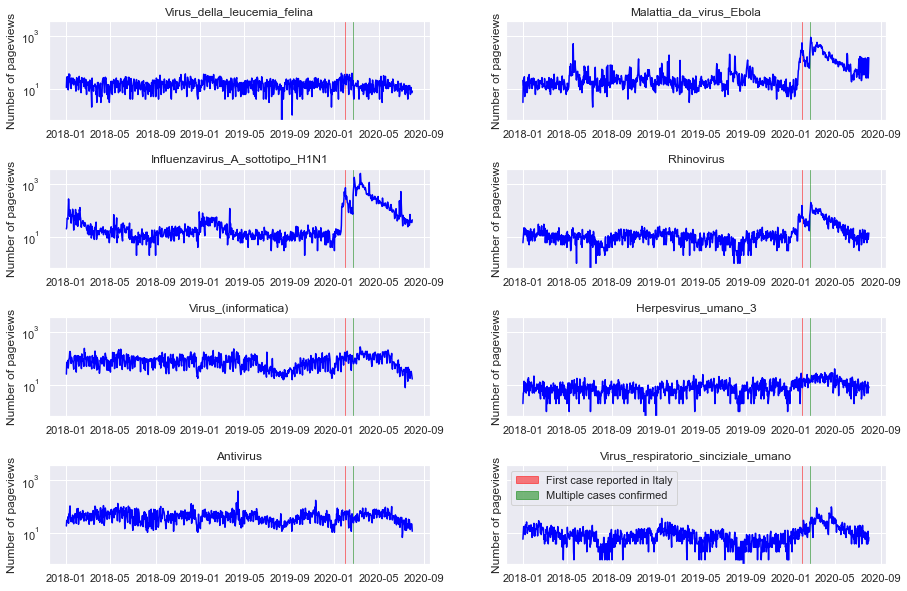

In [41]:
#Create subplots and plot each time-series
fig,axs = plt.subplots(4,2,sharey=True,figsize=(15,10)) 
plt.subplots_adjust(hspace=0.5) #Adjust the horizontal space between subplots
axs = axs.ravel() #axs array, each element represent one subplots

for i in range(8):
    
    axs[i].set_title(virus_articles.index[i]) #Set title for each subplots
    axs[i].set_ylabel('Number of pageviews') #Set y label
    axs[i].plot(virus_articles.columns,virus_articles.iloc[i],color='blue')
    axs[i].axvspan(pd.Timestamp('2020-01-31'),pd.Timestamp('2020-01-31'), label="First case reported in Italy",color="red", alpha=0.5)
    axs[i].axvspan(pd.Timestamp('2020-02-21'),pd.Timestamp('2020-02-21'), label="Multiple cases confirmed",color="green", alpha=0.5)
    axs[i].set_yscale('log') #y-axis on log scale
plt.legend()

### ~ 3.2.3 
Most of the articles regarding virus stayed somewhat constant in their pageviews even when COVID-19 hit Italy.

For Influenzavirus, its pageviews significantly increased when COVID-19 hit Italy and when the situation got more serious in Italy. The increase in pageviews corresponded to people's interest in COVID-19 situation in Italy since COVID-19 is a type of influenzavirus.

The other article that saw a significant increase was that of Ebola. As Ebola had an outbreak in 2014 in multiple countries including Italy, when it emerged once more in May 2018 and 2020 in Congo, it is not surprising that people in Italy were worried about the possibility of Ebola returning or were interested in the similarities and differences between Ebola and COVID-19.

Rhinovirus also had similar peaks in pageviews during the same period. This can be attributed to the altered susceptibility of being infected by both the Rhinovirus and influenzavirus such as COVID-19. 


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

### Idea of Task 3.3
1. To calculate the total number of pageviews each article received, we can sum pageviews up across the whole period for each article. For cdf, we use the function provided in example and pass total pageviews for each article into the function.

2. We create 4 subplots and set different scales for each of them, and plot the CDF.

In [13]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

In [14]:
### ~ 3.3.1

#Calculate the pageviews each article received and cdf of these samples
sum_pageviews = articles.sum(axis=1)
x,y = get_cdf(articles.sum(axis=1).to_numpy()) #Get the cdf

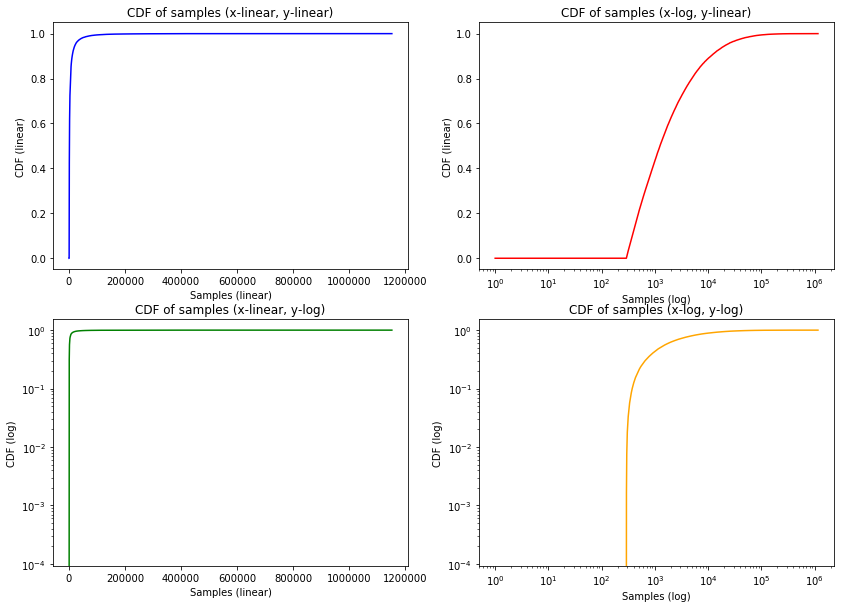

In [49]:
### ~ 3.3.2

#Create 4 subplots and plot for different scales
plt.figure(figsize=(14,10))


plt.subplot(221)
plt.plot(x,y,color='blue') #x-axis on linear scale, y-axis on linear scale
plt.xlabel('Samples (linear)')
plt.ylabel('CDF (linear)')
plt.title('CDF of samples (x-linear, y-linear)')

plt.subplot(222)
plt.plot(x,y,color='red')
plt.xscale('log') #x-axis on log scale, y-axis on linear scale
plt.xlabel('Samples (log)')
plt.ylabel('CDF (linear)')
plt.title('CDF of samples (x-log, y-linear)')

plt.subplot(223)
plt.plot(x,y,color='green')
plt.yscale('log') #x-axis on linear scale, y-axis on log scale
plt.xlabel('Samples (linear)')
plt.ylabel('CDF (log)')
plt.title('CDF of samples (x-linear, y-log)')

plt.subplot(224)
plt.plot(x,y,color='orange')
plt.xscale('log') #x-axis on log scale
plt.yscale('log') #y-axis on log scale
plt.xlabel('Samples (log)')
plt.ylabel('CDF (log)')
plt.title('CDF of samples (x-log, y-log)')

plt.show()

### ~ 3.3.3
The 'b' plot (red) allows us to see the oddity in the distribution of the data. The oddity is that most articles have high numbers of pageviews mainly ranging between 300 and 10 000. Setting the x axis on logarithmic scale helps to display the wide range of values in a compact manner. The other curves increase too quickly to make an observation.

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

### Idea of Task 4.1
1. Basically we select pageviews for the year 2020, and visualize the trend.

2. See discussion cell 4.1.2

3. To make the overall trend clearer, we can calculate average pageviews for every week. This will make the trend clearer.

Text(0.5, 0, 'Date')

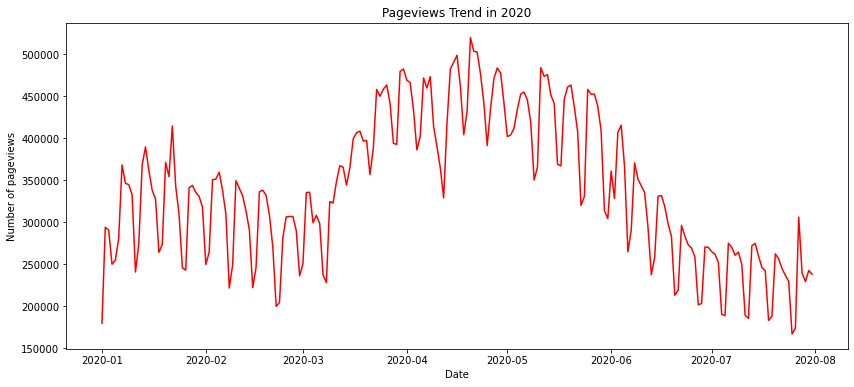

In [16]:
plt.figure(figsize=(14,6))
### ~ 4.1.1


articles.columns = pd.to_datetime(articles.columns)
#Select pageviews in 2020
articles_2020 = articles.iloc[:,articles.columns.year==2020]

#Plot pageview trend
plt.plot(articles_2020.columns,articles_2020.sum(axis=0),color='red')
plt.title('Pageviews Trend in 2020')
plt.ylabel('Number of pageviews')
plt.xlabel('Date')

### ~ 4.1.2

1. Pageviews on weekends are usually lower than weekdays. Therefore there is a decrease on pageviews every week.


We already find that pageviews on weekends are usually lower than weekdays.

One way to make the trend clearer is to group the data by week, and compute the average for every week. 

We also use standard deviation as the error bars.

Text(0, 0.5, 'Number of pageviews')

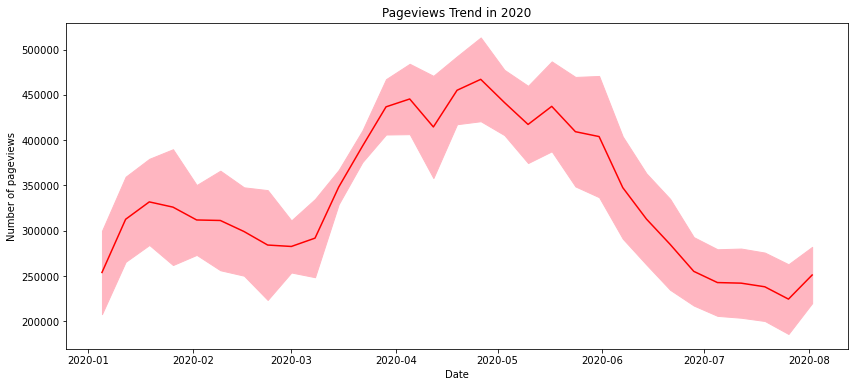

In [17]:
### ~ 4.1.3
fig,ax1=plt.subplots(figsize=(14,6))
#Compute average pageviews for every week
week_average_2020 = articles_2020.sum(axis=0).groupby(pd.Grouper(freq='W')).mean()
#Compute standard deviation of pageviews for every week
error_2020 = articles_2020.sum(axis=0).groupby(pd.Grouper(freq='W')).std()
#Plot the average pageviews for every week
ax1.plot(week_average_2020.index,week_average_2020,color='red')
#Show error bars
ax1.fill_between(week_average_2020.index,week_average_2020-error_2020,week_average_2020+error_2020,color='lightpink')
plt.title('Pageviews Trend in 2020')
plt.xlabel('Date')
plt.ylabel('Number of pageviews')

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

### Idea of Task 4.2
1. The process of visualization is same as in the task 4.1. However, we should show two legends on the graph. To make two lines 'aligned', we can set the limit of x-axis.

Text(0, 0.5, 'Number of pageviews')

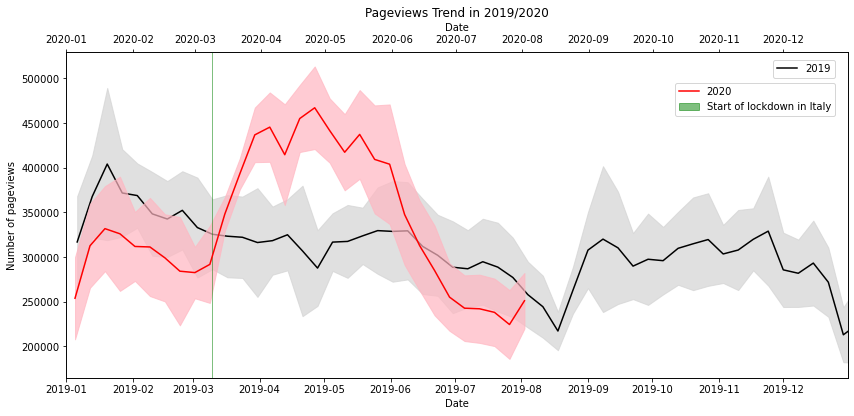

In [18]:
### ~ 4.2.1
articles_2019 = articles.iloc[:,articles.columns.year==2019]


fig,ax1=plt.subplots(figsize=(14,6))
#Share same y-axis.
ax2 = ax1.twiny()

#Compute average pageviews for every week in 2019
week_average_2019 = articles_2019.sum(axis=0).groupby(pd.Grouper(freq='W')).mean()
#Compute standard deviation for every week in 2020
error_2019 = articles_2019.sum(axis=0).groupby(pd.Grouper(freq='W')).std()
#Plot average pageviews and error bars in 2019
ax1.plot(week_average_2019.index,week_average_2019,color='black',label='2019')
ax1.fill_between(week_average_2019.index,week_average_2019-error_2019,week_average_2019+error_2019,color='lightgray',alpha=0.7)
ax1.legend(loc=1,bbox_to_anchor=(0.99, 0.99))

#Plot average pageviews and error bars in 2020
ax2.plot(week_average_2020.index,week_average_2020,color='red',label='2020')
ax2.fill_between(week_average_2020.index,week_average_2020-error_2020,week_average_2020+error_2020,color='lightpink',alpha=0.7)

#Highlight the start date of lockdown in Italy
ax2.axvspan(pd.Timestamp('2020-03-09'),pd.Timestamp('2020-03-09'), label="Start of lockdown in Italy",color="green", alpha=0.5)

#Set the x limit to make two plots 'aligned'
ax1.set_xlim(pd.Timestamp('2019-01-01'),pd.Timestamp('2019-12-31'))
ax2.set_xlim(pd.Timestamp('2020-01-01'),pd.Timestamp('2020-12-31'))

plt.legend(loc=1,bbox_to_anchor=(0.99, 0.92))

plt.title('Pageviews Trend in 2019/2020')
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax1.set_ylabel('Number of pageviews')

### ~ 4.2.2

#### Obeservations
1. Before the lockdown date, the trend of pageviews behaves similarily in these two years.

2. Starting from the lockdown date, average pageviews in 2020 increased tremendously in the following month compared to 2019. And in the following three months, average pageviews surpass the number in 2020.

#### Possible Reasons
1. One possible reason is that people may use their computers more often in the lockdown period. Therefore, there is high probability that people search Wikipedia more often than normal time.


## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

### Idea of Task 5.1

1. We first create a empty dataframe. The index is topics' name and the column is date.

2. Then we use **pd.melt** function to get required format.

3. After we get the empty dataframe, we compute the views for each topic each day.

In [19]:
### ~ 5.1.1

#First, we create a empty dataframe which the index is topics' name and the column is date.
topics_pageviews = pd.DataFrame(data=np.zeros((len(topics.columns),len(articles.columns))),index=topics.columns,columns=articles.columns)
topics_pageviews['index'] = topics_pageviews.index
#Use melt function to get required format
topics_pageviews = pd.melt(topics_pageviews,id_vars=["index"])
#Change the name and data type of columns to satisfy the format
topics_pageviews = topics_pageviews.rename(columns={'variable':'date','value':'views'})
topics_pageviews = topics_pageviews.astype({'views':'int64'})

In [20]:
topics_pageviews

,index,date,views
0,Geography.Regions.Asia.Central Asia,2018-01-01,0
1,Geography.Regions.Europe.Eastern Europe,2018-01-01,0
2,History and Society.Military and warfare,2018-01-01,0
3,Culture.Media.Television,2018-01-01,0
4,History and Society.Education,2018-01-01,0
...,...,...,...
60347,Geography.Regions.Asia.Southeast Asia,2020-07-31,0
60348,Culture.Media.Entertainment,2020-07-31,0
60349,Culture.Media.Music,2020-07-31,0
60350,Geography.Regions.Asia.Asia*,2020-07-31,0


As the results show, we already created a dataframe satisfying the format. The next step is to compute pageviews.

In [21]:
#Compute pageviews for each topic each day

for cur_ind in topics.index:
    cur_topics_list = topics.columns[topics.loc[cur_ind]] #Topic list that one article belongs to
    cur_mapping = mapping[cur_ind] #Italian name of the article name
    
    for cur_topic in cur_topics_list:
        #adding views of articles to topics
        topics_pageviews.loc[topics_pageviews['index']==cur_topic,'views'] += articles.loc[cur_mapping].values 


Let's check the results

In [22]:
topics_pageviews

,index,date,views
0,Geography.Regions.Asia.Central Asia,2018-01-01,317
1,Geography.Regions.Europe.Eastern Europe,2018-01-01,2517
2,History and Society.Military and warfare,2018-01-01,7126
3,Culture.Media.Television,2018-01-01,16048
4,History and Society.Education,2018-01-01,513
...,...,...,...
60347,Geography.Regions.Asia.Southeast Asia,2020-07-31,738
60348,Culture.Media.Entertainment,2020-07-31,3771
60349,Culture.Media.Music,2020-07-31,11946
60350,Geography.Regions.Asia.Asia*,2020-07-31,7209


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

### Idea of Task 5.2
1. We first get views for two periods and group them by topics. Then, we compute the average pageviews for each topic in this period.

2. Then we visualize these average pageviews.


In [23]:
import seaborn as sns

### ~ 5.2

#Compute the mean for these two periods

before_quarantine = articles.columns[763:798] #First period: 2.3-3.8, 35 days
after_quarantine = articles.columns[798:832] #Secondg period: 3.9-4.11, 34 days

#Get views for two periods and group them by topics. Then compute the average value.
views_before_quarantine = topics_pageviews.loc[topics_pageviews['date'].isin(before_quarantine)].groupby('index').mean()
views_after_quarantine = topics_pageviews.loc[topics_pageviews['date'].isin(after_quarantine)].groupby('index').mean()

#Reset index
views_before_quarantine = views_before_quarantine.reset_index()
views_after_quarantine = views_after_quarantine.reset_index()

#Add a column named 'period'
views_before_quarantine['period'] = 'Before quarantine'
views_after_quarantine['period'] = 'After quarantine'

#Merge two dataframes
views_two_periods=pd.concat([views_before_quarantine,views_after_quarantine])

#Rename
views_two_periods = views_two_periods.rename(columns={'index':'topic'})

In [24]:
views_two_periods

,topic,views,period
0,Culture.Biography.Biography*,64463.771429,Before quarantine
1,Culture.Biography.Women,12584.057143,Before quarantine
2,Culture.Food and drink,3210.714286,Before quarantine
3,Culture.Internet culture,8280.885714,Before quarantine
4,Culture.Linguistics,2922.857143,Before quarantine
...,...,...,...
59,STEM.Medicine & Health,17230.794118,After quarantine
60,STEM.Physics,7917.441176,After quarantine
61,STEM.STEM*,82243.147059,After quarantine
62,STEM.Space,2988.294118,After quarantine


Now we already have the views before and after quarantine for each topic. We can visulize them by using Facetgrid and pointplot.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


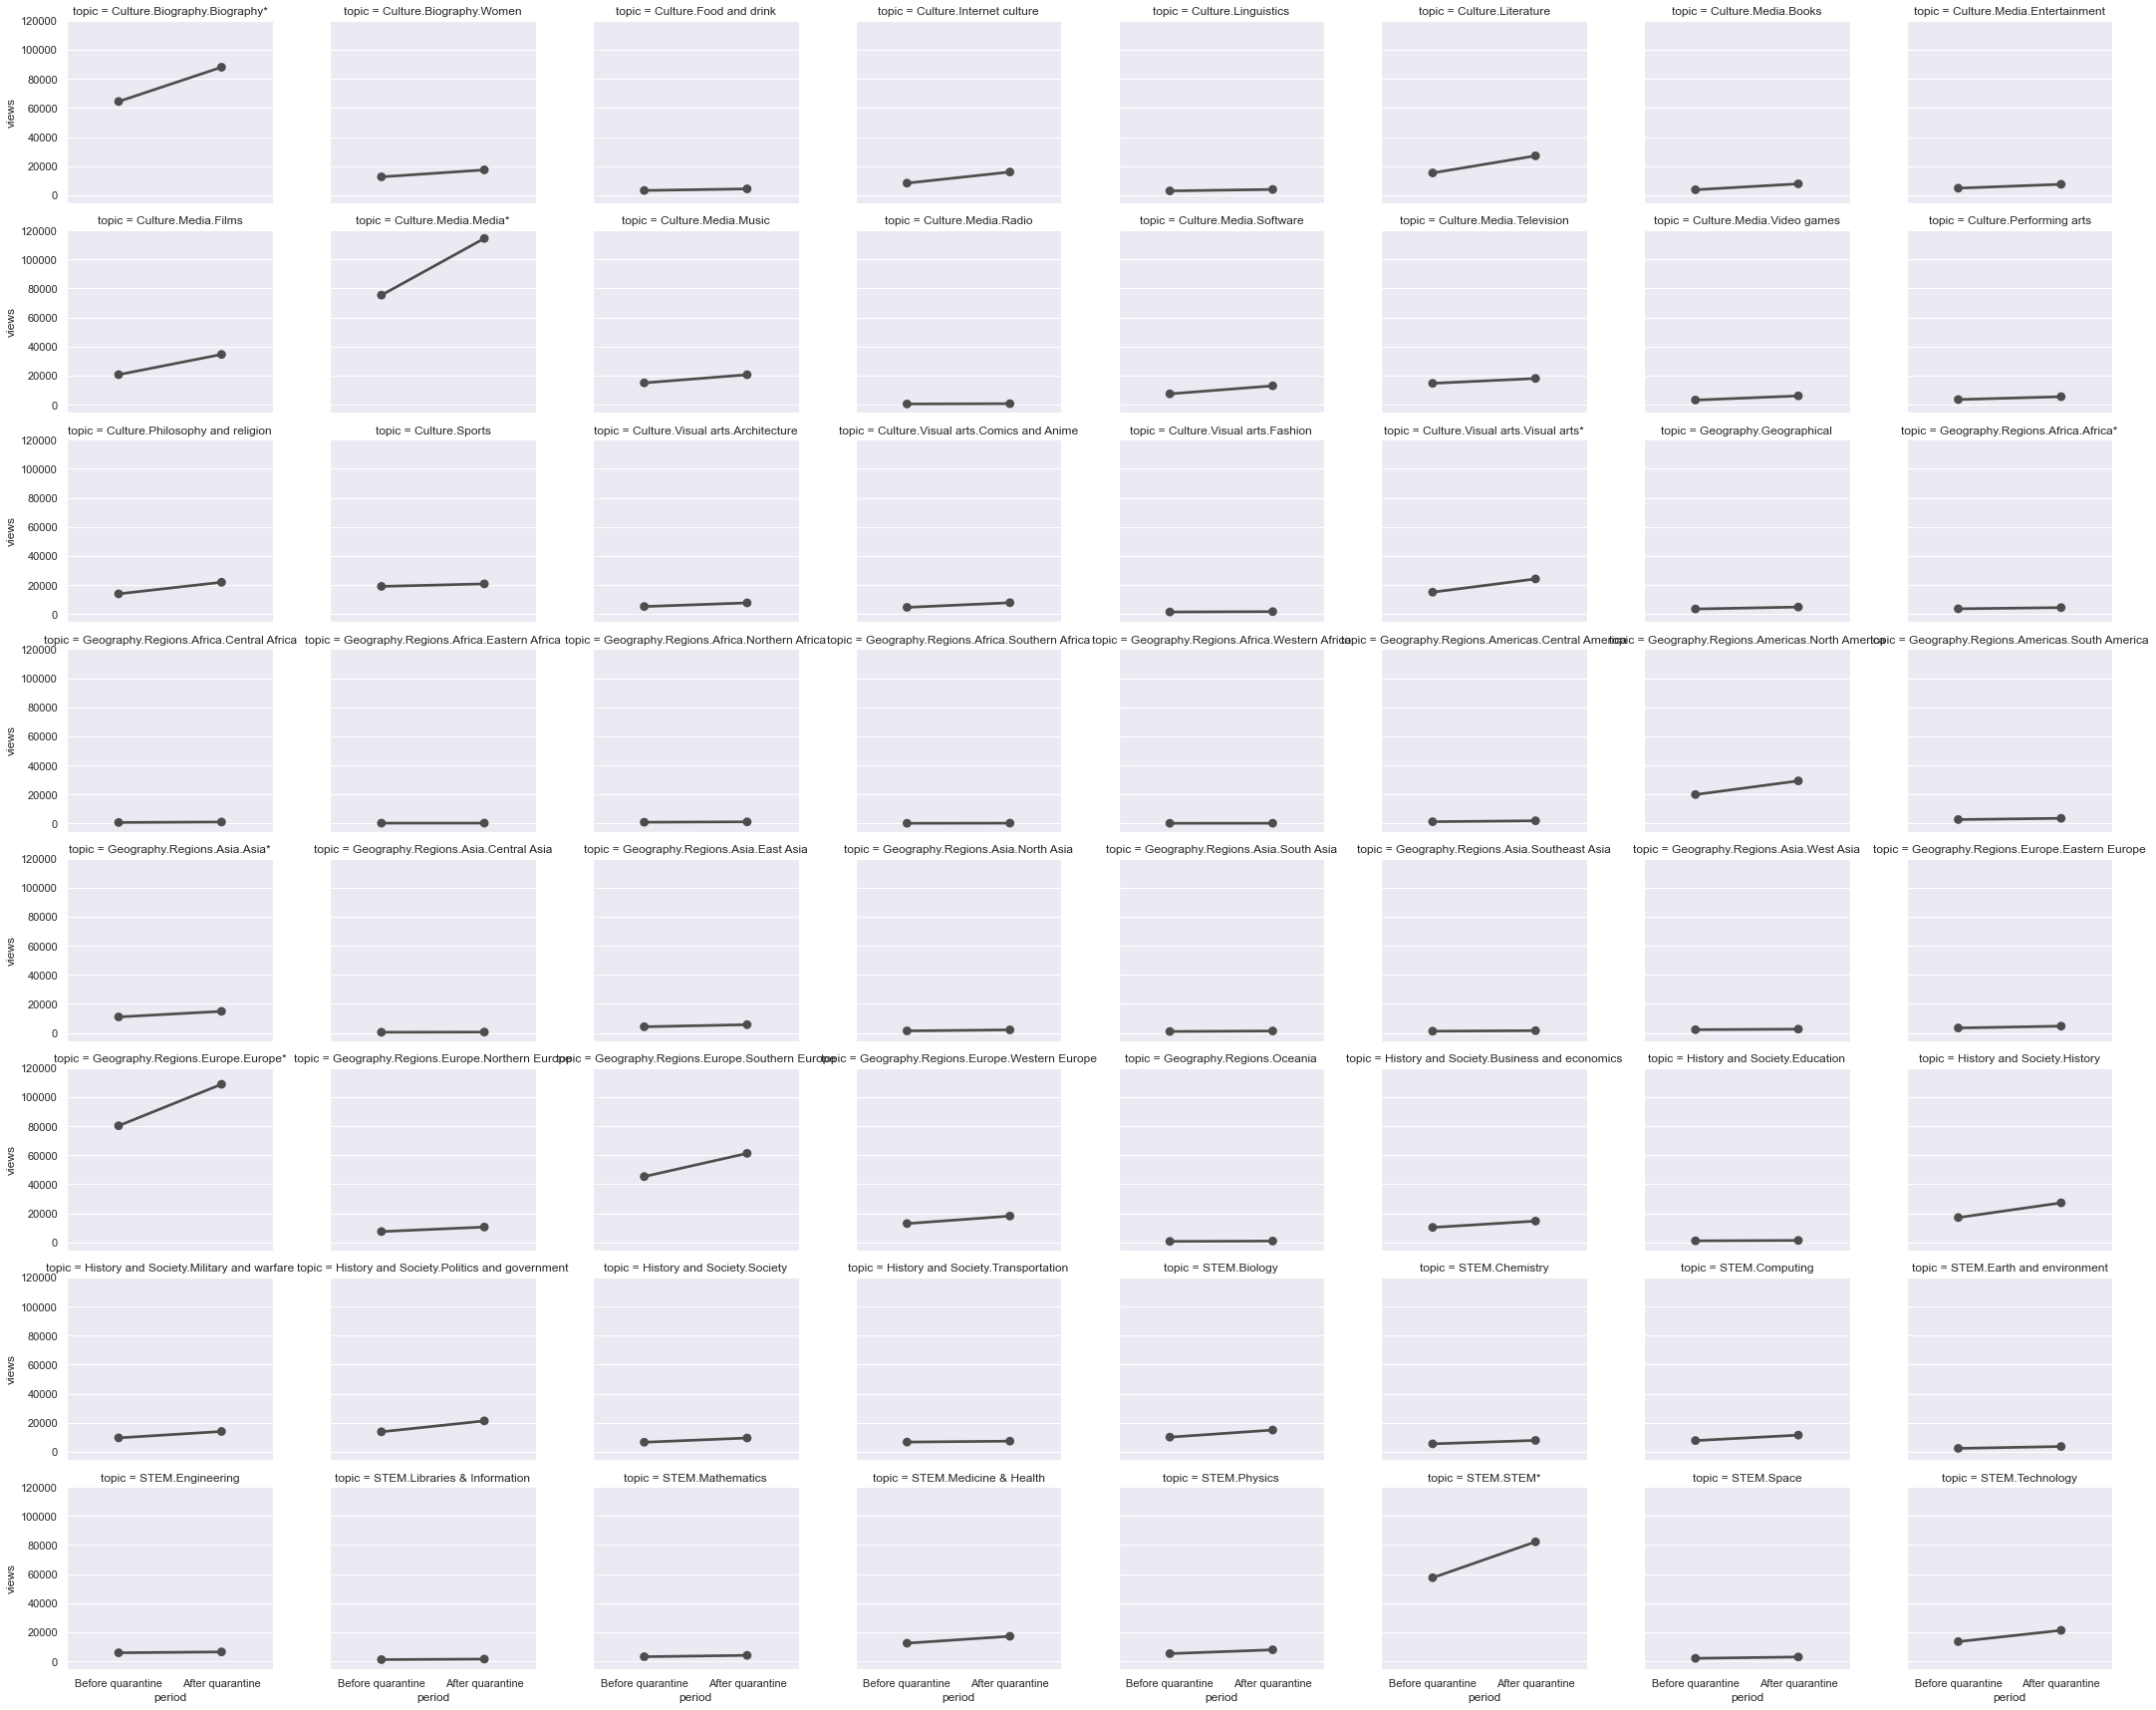

In [25]:
#Use seaborn facetgrid to automatically create subplots
sns.set(rc={'figure.figsize':(20,16)})
g = sns.FacetGrid(views_two_periods,col='topic',col_wrap=8,sharey=True,aspect=1.25,)
#g.map(sns.barplot, "period", "views",color=".3")
g.map(sns.pointplot, "period", "views",color=".3")

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

#### Idea of Task 5.3
1. To nomalize the pageviews, we compute the fraction of all pageviews a topic receved for each day. The formula is:
   fraction = (pageviews for one topic at that day)/(pageviews for all topics at that day)
    
2. We add a column named 'fraction'. Then we do visualization as we have done in task 5.2

In [31]:
### ~ 5.3.1
day_sum_views = topics_pageviews.groupby('date').sum()
topics_pageviews['fraction'] = 0

#Calculate the fraction
fraction_group = topics_pageviews.groupby('date').apply(lambda x: x['views']/day_sum_views.loc[x.date.iloc[0],'views'])

for cur_date in articles.columns:
    #assgin fraction values
    topics_pageviews.loc[topics_pageviews['date'] == cur_date,'fraction'] = fraction_group[cur_date]
    
topics_pageviews

,index,date,views,fraction
0,Geography.Regions.Asia.Central Asia,2018-01-01,317,0.000556
1,Geography.Regions.Europe.Eastern Europe,2018-01-01,2517,0.004412
2,History and Society.Military and warfare,2018-01-01,7126,0.012490
3,Culture.Media.Television,2018-01-01,16048,0.028128
4,History and Society.Education,2018-01-01,513,0.000899
...,...,...,...,...
60347,Geography.Regions.Asia.Southeast Asia,2020-07-31,738,0.001219
60348,Culture.Media.Entertainment,2020-07-31,3771,0.006230
60349,Culture.Media.Music,2020-07-31,11946,0.019737
60350,Geography.Regions.Asia.Asia*,2020-07-31,7209,0.011911


In [37]:
fraction_before_quarantine = topics_pageviews.loc[topics_pageviews['date'].isin(before_quarantine)].groupby('index').mean()
fraction_after_quarantine = topics_pageviews.loc[topics_pageviews['date'].isin(after_quarantine)].groupby('index').mean()

#Reset index
fraction_before_quarantine = fraction_before_quarantine.reset_index()
fraction_after_quarantine = fraction_after_quarantine.reset_index()

#Add a column named 'period'
fraction_before_quarantine['period'] = 'Before quarantine'
fraction_after_quarantine['period'] = 'After quarantine'

#Merge two dataframes
fraction_two_periods=pd.concat([fraction_before_quarantine,fraction_after_quarantine])

#Rename
fraction_two_periods = fraction_two_periods.rename(columns={'index':'topic'})

In [38]:
fraction_two_periods

,topic,views,fraction,period
0,Culture.Biography.Biography*,64463.771429,0.090797,Before quarantine
1,Culture.Biography.Women,12584.057143,0.017710,Before quarantine
2,Culture.Food and drink,3210.714286,0.004504,Before quarantine
3,Culture.Internet culture,8280.885714,0.011701,Before quarantine
4,Culture.Linguistics,2922.857143,0.004089,Before quarantine
...,...,...,...,...
59,STEM.Medicine & Health,17230.794118,0.016844,After quarantine
60,STEM.Physics,7917.441176,0.007675,After quarantine
61,STEM.STEM*,82243.147059,0.080107,After quarantine
62,STEM.Space,2988.294118,0.002905,After quarantine


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


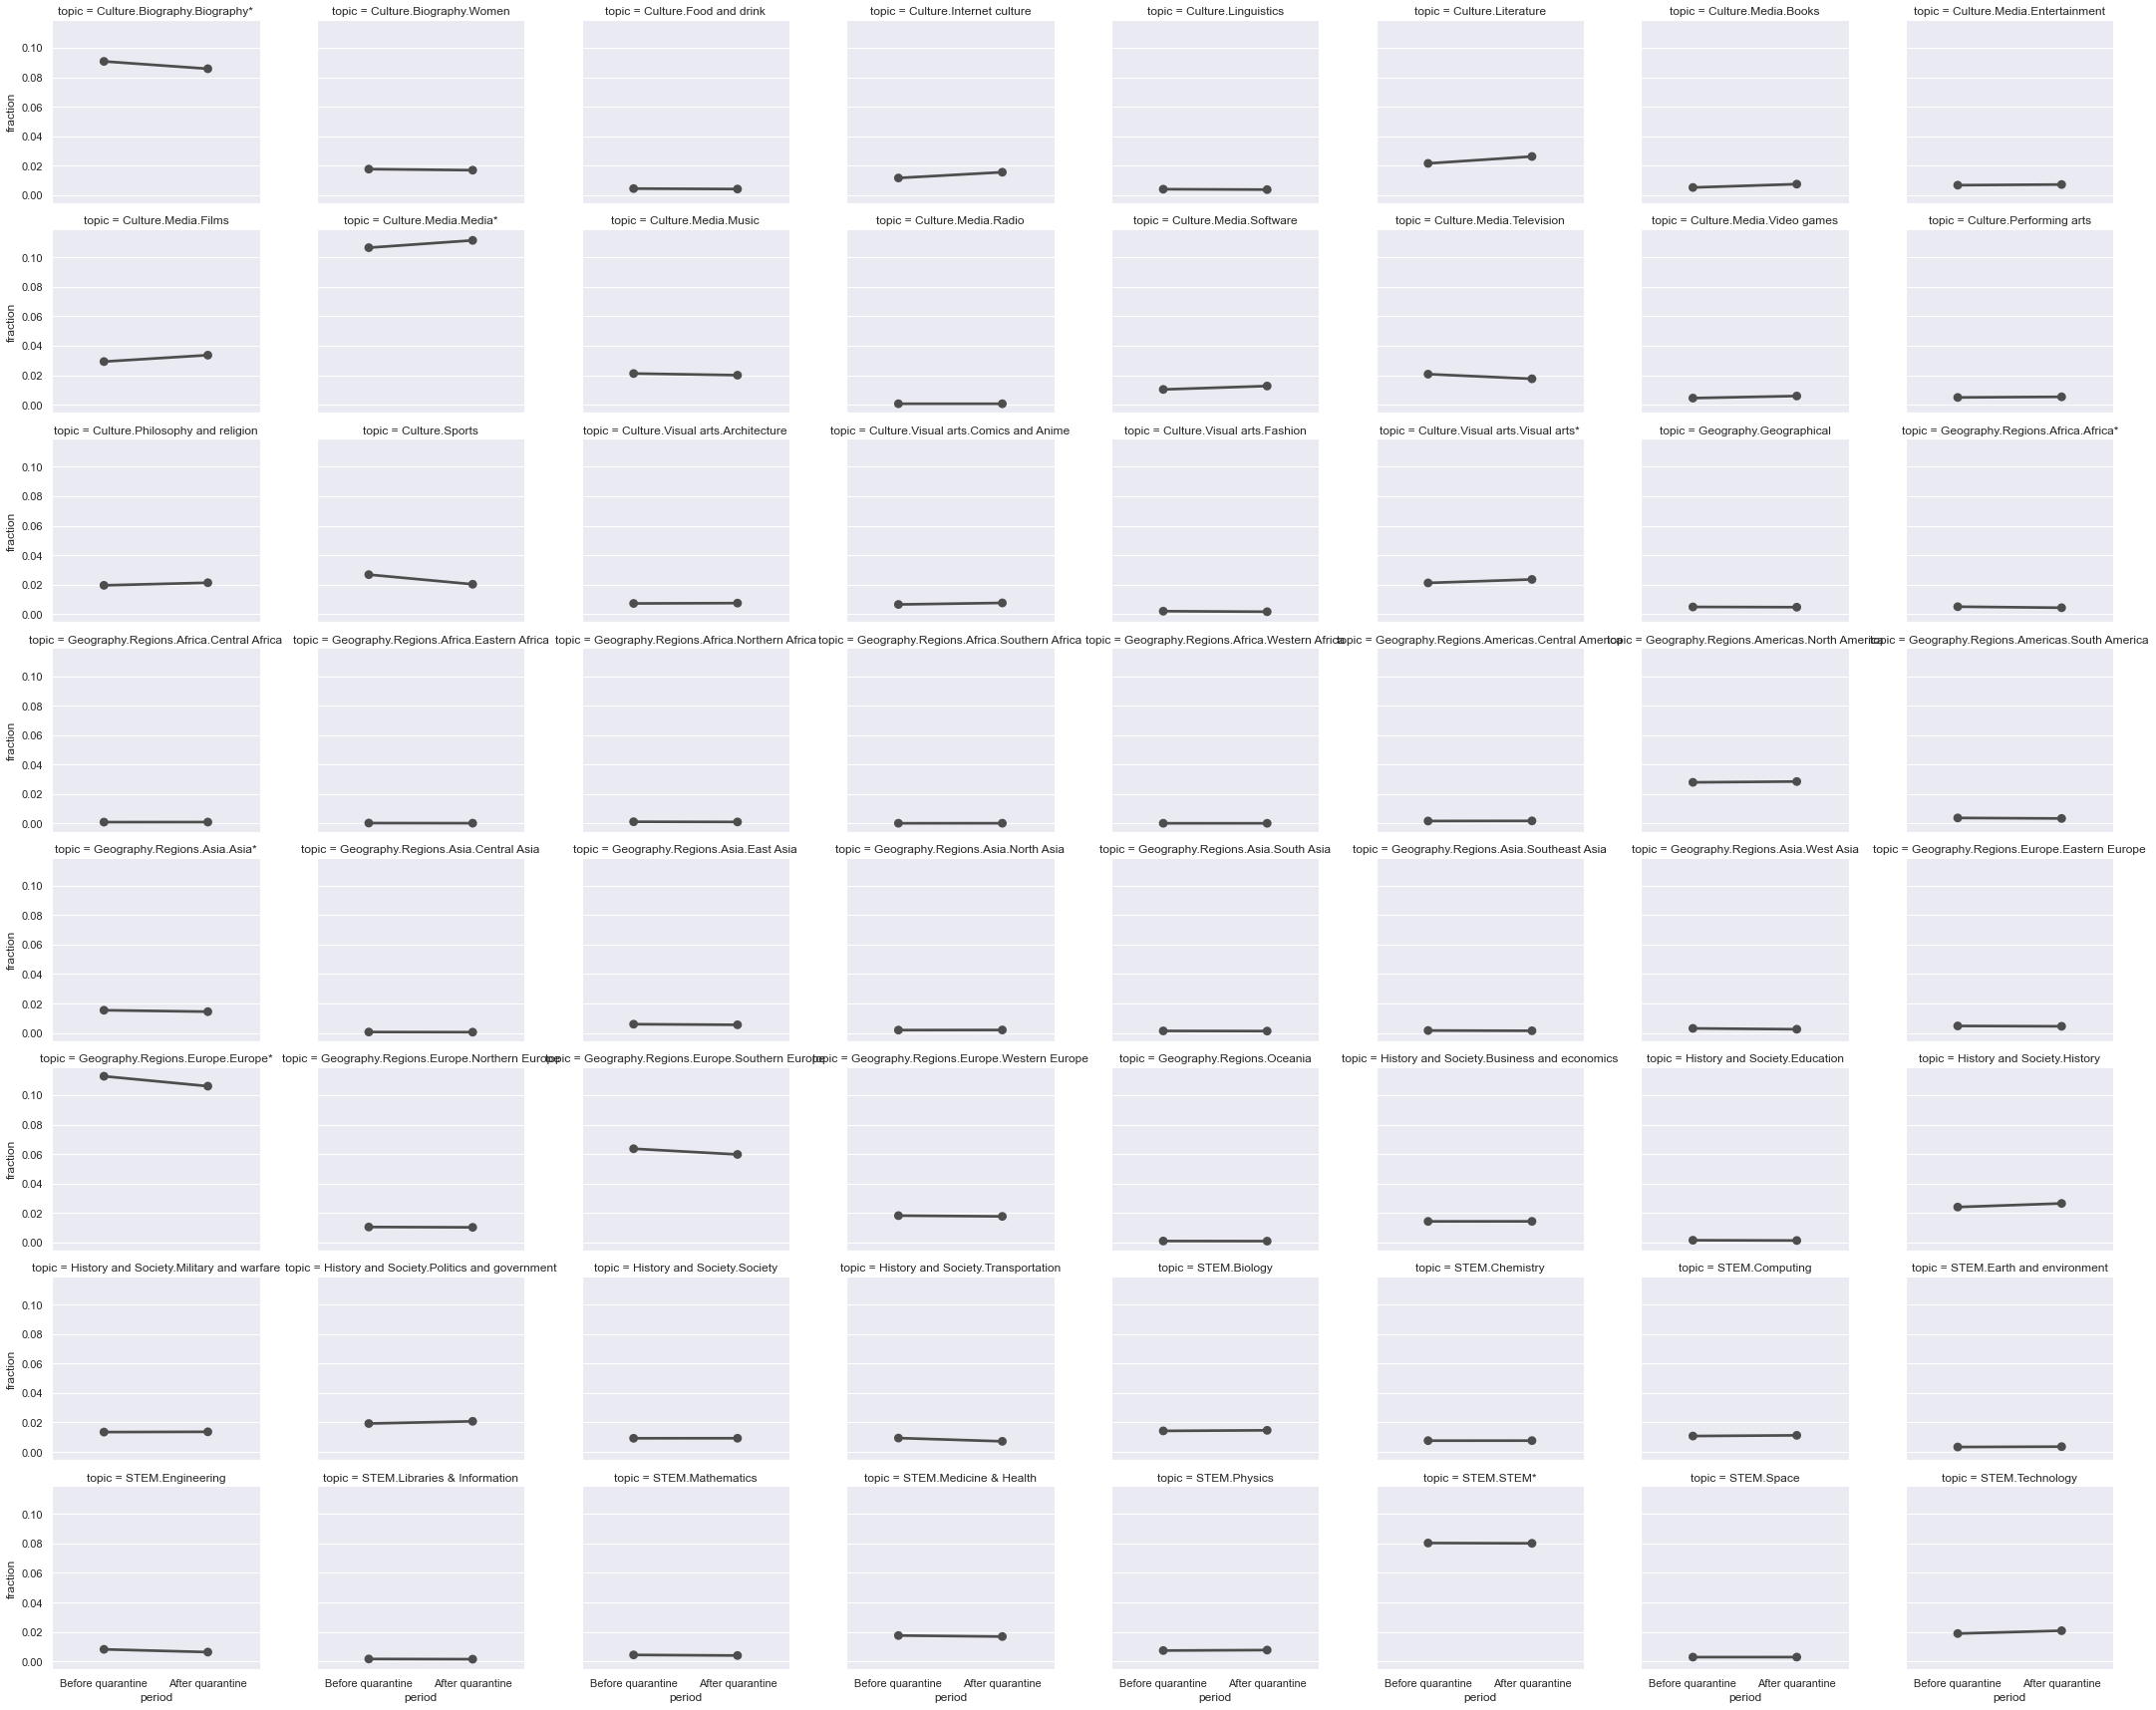

In [39]:
#Use seaborn facetgrid to automatically create subplots
sns.set(rc={'figure.figsize':(20,16)})
g = sns.FacetGrid(fraction_two_periods,col='topic',col_wrap=8,sharey=True,aspect=1.25,)
#g.map(sns.barplot, "period", "views",color=".3")
g.map(sns.pointplot, "period", "fraction",color=".3")

### ~ 5.3.3 

1. According to task 5.2, obviously, almost all topics' pageviews increased in term of raw data. For example, 'Culture.Biography.Biography' increased around 20,000 views.

2. However, in relative, these findings do not hold. The fraction of these topics' pageviews almost didn't change. Only a few topics' fraction increased, while some decreased. Increase in pageviews for a topic does not correspond to its relative popularity.

---